# Delhivery Case Study

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statistics

import warnings
warnings.simplefilter('ignore')

In [2]:
# get the dataset (csv file) from the link

!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv

--2024-05-09 15:23:09--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.238.102.53, 18.238.102.185, 18.238.102.180, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.238.102.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery_data.csv’

delhivery_data.csv  100%[===================>]  53.04M  74.9MB/s    in 0.7s    

2024-05-09 15:23:09 (74.9 MB/s) - ‘delhivery_data.csv’ saved [55617130/55617130]



In [3]:
# read the csv file

df=pd.read_csv("delhivery_data.csv")

## Basic data cleaning and exploration

In [4]:
df.shape

(144867, 24)

**Insights:** Dataset has 144867 rows and 24 columns.


In [5]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [6]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

#### Column Profiling

1. **data** - tells whether the data is testing or training data

2. **trip_creation_time** – Timestamp of trip creation

3. **route_schedule_uuid** – Unique ID for a particular route schedule

4. **route_type** – Transportation type

  a. **FTL** – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way

  b. **Carting** – Handling system consisting of small vehicles (carts)

5. **trip_uuid** – Unique ID given to a particular trip (A trip may include different source and destination centers)

6. **source_center** – Source ID of trip origin

7. **source_name** – Source Name of trip origin

8. **destination_cente** – Destination ID

9. **destination_name** – Destination Name

10. **od_start_time** – Trip start time

11. **od_end_time** – Trip end time

12. **start_scan_to_end_scan** – Time taken to deliver from source to destination

13. **is_cutoff** – Unknown field

14. **cutoff_factor** – Unknown field

15. **cutoff_timestamp** – Unknown field

16. **actual_distance_to_destination** – Distance in kms between source and destination warehouse

17. **actual_time** – Actual time taken to complete the delivery (Cumulative)

18. **osrm_time** – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

19. **osrm_distance** – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

20. **factor** – Unknown field

21. **segment_actual_time** – This is a segment time. Time taken by the subset of the package delivery

22. **segment_osrm_time** – This is the OSRM segment time. Time taken by the subset of the package delivery

23. **segment_osrm_distance** – This is the OSRM distance. Distance covered by subset of the package delivery

24. **segment_factor** – Unknown field

In [7]:
# Basic Information about the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [8]:
# Dropping unknown fields

unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df = df.drop(columns = unknown_fields)

In [9]:
# Number of unique entries in each column

for column in df.columns:
    print(f"Unique entries for column {column:<30} = {df[column].nunique()}")

Unique entries for column data                           = 2
Unique entries for column trip_creation_time             = 14817
Unique entries for column route_schedule_uuid            = 1504
Unique entries for column route_type                     = 2
Unique entries for column trip_uuid                      = 14817
Unique entries for column source_center                  = 1508
Unique entries for column source_name                    = 1498
Unique entries for column destination_center             = 1481
Unique entries for column destination_name               = 1468
Unique entries for column od_start_time                  = 26369
Unique entries for column od_end_time                    = 26369
Unique entries for column start_scan_to_end_scan         = 1915
Unique entries for column actual_distance_to_destination = 144515
Unique entries for column actual_time                    = 3182
Unique entries for column osrm_time                      = 1531
Unique entries for column osrm_distance 

In [10]:
# Columns where the number of unique entries is 2, converting their datatype to category

df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

In [11]:
# Checking maximum value of features having float64 datatype

floating_columns = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance',
                    'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']

for column in floating_columns:
    print(df[column].max())

1927.4477046975032
4532.0
1686.0
2326.1991000000003
3051.0
1611.0
2191.4037000000003


In [12]:
# Since the maximum value entries are small, converting their datatype to float32

for column in floating_columns:
    df[column] = df[column].astype('float32')

In [13]:
# Converting the datatype of the datetime columns

datetime_columns = ['trip_creation_time','od_start_time','od_end_time']

for column in datetime_columns:
    df[column] = pd.to_datetime(df[column])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

**Insights:** The dataset now only uses 15.2+ MB of memory, down from 25.6+ MB previously. A reduction of about 40.63 percent in RAM use.

In [15]:
# Duplicate row check

df.duplicated().sum()

0

In [16]:
# Null/Missing value check

df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

**Insights:**

*  All rows of the dataset are unique.

*  The dataset has null/missing values in `source_name` and `destination_name` columns.


### Handling missing values

In [17]:
# Finding the distinct source_center that corresponds to the missing source_name

missing_source_name = df.loc[df['source_name'].isnull(), 'source_center'].unique()
missing_source_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [18]:
# Checking if the name is present for the above center (missing_source_name) in source_name feature

for name in missing_source_name:
    unique_source_name = df.loc[df['source_center'] == name, 'source_name'].unique()
    if (pd.isna(unique_source_name)) or (unique_source_name.size == 0):
        print("Source Center :", name, "-" * 10, "Source Name :", 'Not Found')
    else :
        print("Source Center :", name, "-" * 10, "Source Name :", unique_source_name)

Source Center : IND342902A1B ---------- Source Name : Not Found
Source Center : IND577116AAA ---------- Source Name : Not Found
Source Center : IND282002AAD ---------- Source Name : Not Found
Source Center : IND465333A1B ---------- Source Name : Not Found
Source Center : IND841301AAC ---------- Source Name : Not Found
Source Center : IND509103AAC ---------- Source Name : Not Found
Source Center : IND126116AAA ---------- Source Name : Not Found
Source Center : IND331022A1B ---------- Source Name : Not Found
Source Center : IND505326AAB ---------- Source Name : Not Found
Source Center : IND852118A1B ---------- Source Name : Not Found


In [19]:
# Checking if the name is present for the above center (missing_source_name) in destination_name feature

for name in missing_source_name:
    unique_destination_name = df.loc[df['destination_center'] == name, 'destination_name'].unique()
    if (pd.isna(unique_destination_name)) or (unique_destination_name.size == 0):
        print("Destination Center :", name, "-" * 10, "Destination Name :", 'Not Found')
    else :
        print("Destination Center :", name, "-" * 10, "Destination Name :", unique_destination_name)

Destination Center : IND342902A1B ---------- Destination Name : Not Found
Destination Center : IND577116AAA ---------- Destination Name : Not Found
Destination Center : IND282002AAD ---------- Destination Name : Not Found
Destination Center : IND465333A1B ---------- Destination Name : Not Found
Destination Center : IND841301AAC ---------- Destination Name : Not Found
Destination Center : IND509103AAC ---------- Destination Name : Not Found
Destination Center : IND126116AAA ---------- Destination Name : Not Found
Destination Center : IND331022A1B ---------- Destination Name : Not Found
Destination Center : IND505326AAB ---------- Destination Name : Not Found
Destination Center : IND852118A1B ---------- Destination Name : Not Found


In [20]:
# Finding the distinct destination_center that corresponds to the missing destination_name

missing_destination_name = df.loc[df['destination_name'].isnull(), 'destination_center'].unique()
missing_destination_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [21]:
# Checking if the name is present for the above center (missing_destination_name) in destination_name feature

for name in missing_destination_name:
    unique_destination_name = df.loc[df['destination_center'] == name, 'destination_name'].unique()
    if (pd.isna(unique_destination_name)) or (unique_destination_name.size == 0):
        print("Destination Center :", name, "-" * 10, "Destination Name :", 'Not Found')
    else :
        print("Destination Center :", name, "-" * 10, "Destination Name :", unique_destination_name)

Destination Center : IND342902A1B ---------- Destination Name : Not Found
Destination Center : IND577116AAA ---------- Destination Name : Not Found
Destination Center : IND282002AAD ---------- Destination Name : Not Found
Destination Center : IND465333A1B ---------- Destination Name : Not Found
Destination Center : IND841301AAC ---------- Destination Name : Not Found
Destination Center : IND505326AAB ---------- Destination Name : Not Found
Destination Center : IND852118A1B ---------- Destination Name : Not Found
Destination Center : IND126116AAA ---------- Destination Name : Not Found
Destination Center : IND509103AAC ---------- Destination Name : Not Found
Destination Center : IND221005A1A ---------- Destination Name : Not Found
Destination Center : IND250002AAC ---------- Destination Name : Not Found
Destination Center : IND331001A1C ---------- Destination Name : Not Found
Destination Center : IND122015AAC ---------- Destination Name : Not Found


In [22]:
# Checking if the name is present for the above center (missing_destination_name) in source_name feature

for name in missing_destination_name:
    unique_source_name = df.loc[df['source_center'] == name, 'source_name'].unique()
    if (pd.isna(unique_source_name)) or (unique_source_name.size == 0):
        print("Source Center :", name, "-" * 10, "Source Name :", 'Not Found')
    else :
        print("Source Center :", name, "-" * 10, "Source Name :", unique_source_name)

Source Center : IND342902A1B ---------- Source Name : Not Found
Source Center : IND577116AAA ---------- Source Name : Not Found
Source Center : IND282002AAD ---------- Source Name : Not Found
Source Center : IND465333A1B ---------- Source Name : Not Found
Source Center : IND841301AAC ---------- Source Name : Not Found
Source Center : IND505326AAB ---------- Source Name : Not Found
Source Center : IND852118A1B ---------- Source Name : Not Found
Source Center : IND126116AAA ---------- Source Name : Not Found
Source Center : IND509103AAC ---------- Source Name : Not Found
Source Center : IND221005A1A ---------- Source Name : Not Found
Source Center : IND250002AAC ---------- Source Name : Not Found
Source Center : IND331001A1C ---------- Source Name : Not Found
Source Center : IND122015AAC ---------- Source Name : Not Found


**Insights:** The data contains 10 source_centers for missing source_name and 13 destination_centers for missing destination_name, but none of the locations have a name in the entire data.

In [23]:
# Check if any missing source name is in missing destination names
any_missing_source_in_destination = any(source in missing_destination_name for source in missing_source_name)

# Check if all missing source names are in missing destination names
all_missing_source_in_destination = all(source in missing_destination_name for source in missing_source_name)

print("Any missing source name in missing destination names:", any_missing_source_in_destination)
print("All missing source names in missing destination names:", all_missing_source_in_destination)

Any missing source name in missing destination names: True
All missing source names in missing destination names: False


In [24]:
# Merge the two arrays to create a single array containing all unique IDs
all_unique_ids = np.unique(np.concatenate((missing_source_name, missing_destination_name)))

# Create a dictionary mapping unique IDs to unique locations
id_to_location_dict = {id: f"Location_{i+1}" for i, id in enumerate(all_unique_ids)}

print("Dictionary of unique IDs and corresponding locations:")
print(id_to_location_dict)

Dictionary of unique IDs and corresponding locations:
{'IND122015AAC': 'Location_1', 'IND126116AAA': 'Location_2', 'IND221005A1A': 'Location_3', 'IND250002AAC': 'Location_4', 'IND282002AAD': 'Location_5', 'IND331001A1C': 'Location_6', 'IND331022A1B': 'Location_7', 'IND342902A1B': 'Location_8', 'IND465333A1B': 'Location_9', 'IND505326AAB': 'Location_10', 'IND509103AAC': 'Location_11', 'IND577116AAA': 'Location_12', 'IND841301AAC': 'Location_13', 'IND852118A1B': 'Location_14'}


In [25]:
# Inserting the missing location name from id_to_location_dict dictionary in the source_name feature

for name in missing_source_name:
    df.loc[df['source_center'] == name, 'source_name'] = df.loc[df['source_center'] == name, 'source_name'].replace(np.nan, id_to_location_dict.get(name))

In [26]:
# Inserting the missing location name from id_to_location_dict dictionary in the destination_name feature

for name in missing_destination_name:
    df.loc[df['destination_center'] == name, 'destination_name'] = df.loc[df['destination_center'] == name, 'destination_name'].replace(np.nan, id_to_location_dict.get(name))

In [27]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

**Insights:** The dataset now has no null / missing value.

In [28]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,144867,2018-09-22 13:34:23.659819264,2018-09-12 00:00:16.535741,2018-09-17 03:20:51.775845888,2018-09-22 04:24:27.932764928,2018-09-27 17:57:56.350054912,2018-10-03 23:59:42.701692,NaN
od_start_time,144867,2018-09-22 18:02:45.855230720,2018-09-12 00:00:16.535741,2018-09-17 08:05:40.886155008,2018-09-22 08:53:00.116656128,2018-09-27 22:41:50.285857024,2018-10-06 04:27:23.392375,NaN
od_end_time,144867,2018-09-23 10:04:31.395393024,2018-09-12 00:50:10.814399,2018-09-18 01:48:06.410121984,2018-09-23 03:13:03.520212992,2018-09-28 12:49:06.054018048,2018-10-08 03:00:24.353479,NaN
start_scan_to_end_scan,144867.0,961.262986,20.0,161.0,449.0,1634.0,7898.0,1037.012769
actual_distance_to_destination,144867.0,234.07338,9.000046,23.355875,66.126572,286.708878,1927.447754,344.990021
actual_time,144867.0,416.927521,9.0,51.0,132.0,513.0,4532.0,598.103638
osrm_time,144867.0,213.868286,6.0,27.0,64.0,257.0,1686.0,308.011078
osrm_distance,144867.0,284.771301,9.0082,29.914701,78.525803,343.193253,2326.199219,421.119293
segment_actual_time,144867.0,36.19611,-244.0,20.0,29.0,40.0,3051.0,53.571156
segment_osrm_time,144867.0,18.507547,0.0,11.0,17.0,22.0,1611.0,14.77596


In [29]:
df.describe(include='object').T

,count,unique,top,freq
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144867,1508,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144867,1481,Gurgaon_Bilaspur_HB (Haryana),15192


**Insights:**

1. Trips mainly created between September 12 to October 3, 2018.

2. Trip durations range from 9 to 513 minutes.

3. Most trips cover distances between 9 and 1927 meters.

4. Start to end scan time averages around 961 seconds.

5. Actual and OSRM times show some discrepancy.

6. Negative values in segment actual time need investigation.

7. Segment OSRM distance relatively consistent, averaging around 22 meters.

8. OSRM time and distance generally lower than actual measurements.

9. Commonly, trips originate and end at Gurgaon_Bilaspur_HB.

10. IND000000ACB frequently used as source and destination centers.



## Merging of rows and aggregation of fields

### Grouping by segment

In [30]:
# Create segment_key

df['segment_key'] = df['trip_uuid'] + '_' + df['source_center'] + '_' + df['destination_center']

In [31]:
# Grouping by segment

segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in segment_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()

df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.965300,14.0,11.0,11.9653,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.965300,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,24.0,20.0,21.724300,10.0,9.0,9.7590,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,21.724300,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,40.0,28.0,32.539501,16.0,7.0,10.8152,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,32.539497,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,62.0,40.0,45.562000,21.0,12.0,13.0224,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,45.561897,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,68.0,44.0,54.218102,6.0,5.0,3.9153,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.477200,44.0


### Aggregating at segment level

In [32]:
# Creating a dictionary named create_segment_dict for aggregation

create_segment_dict = {
    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',
    }

In [33]:
# Grouping the data by segment_key

segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()

# Sorting the resulting DataFrame by segment_key and od_end_time

segment = segment.sort_values(by=['segment_key','od_end_time'])

segment.head()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759155,732.0,329.0,446.549591,728.0,670.620483,534.0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973694,830.0,388.0,544.802673,820.0,649.852783,474.0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644020,47.0,26.0,28.199400,46.0,28.199501,26.0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542889,96.0,42.0,56.911598,95.0,55.989899,39.0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439606,611.0,212.0,281.210907,608.0,317.740784,231.0


In [34]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     26368 non-null  object        
 1   data                            26368 non-null  category      
 2   trip_creation_time              26368 non-null  datetime64[ns]
 3   route_schedule_uuid             26368 non-null  object        
 4   route_type                      26368 non-null  category      
 5   trip_uuid                       26368 non-null  object        
 6   source_center                   26368 non-null  object        
 7   source_name                     26368 non-null  object        
 8   destination_center              26368 non-null  object        
 9   destination_name                26368 non-null  object        
 10  od_start_time                   26368 non-null  datetime64[ns]
 11  od

**Insights:** After grouping and aggregating at segment level, now the dataset only uses 3.0+ MB of memory.

## Feature Engineering

### Calculating time taken between od_start_time and od_end_time.

In [35]:
# Calculating time taken between od_start_time and od_end_time and keeping it as a feature named od_time_diff_hour

segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds() / 60

# Droping the original columns

segment.drop(['od_start_time', 'od_end_time'], axis=1, inplace=True)

segment['od_time_diff_hour']

0        1260.604421
1         999.505379
2          58.832388
3         122.779486
4         834.638929
            ...     
26363      62.115193
26364      91.087797
26365      44.174403
26366     287.474007
26367      66.933565
Name: od_time_diff_hour, Length: 26368, dtype: float64

In [36]:
segment['od_time_diff_hour'].describe()

count    26368.000000
mean       298.777478
std        440.561220
min         20.702813
25%         91.034908
50%        152.518472
75%        307.099104
max       7898.551955
Name: od_time_diff_hour, dtype: float64

**Insights:**

*  Time between od_start_time and od_end_time averages around 299 hours.

*  Minimum time is about 21 hours, maximum exceeds 7898 hours.

*  Most trips last between 91 and 307 hours.

### Functions for spliting and extracting features out of Source name and Destination name.

In [37]:
def location_name_to_state(x):
    l = x.split('(')
    if len(l) == 1:
        return l[0]
    else:
        return l[1].replace(')', "")

In [38]:
def location_name_to_city(x):
    if 'Location' in x:
        return 'unknown_city'
    else:
        l = x.split()[0].split('_')
        if 'CCU' in x.upper():
            return 'Kolkata'
        elif 'MAA' in x.upper():
            return 'Chennai'
        elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
            return 'Bengaluru'
        elif 'FBD' in x.upper():
            return 'Faridabad'
        elif 'BOM' in x.upper():
            return 'Mumbai'
        elif 'DEL' in x.upper():
            return 'Delhi'
        elif 'OK' in x.upper():
            return 'Delhi'
        elif 'GZB' in x.upper():
            return 'Ghaziabad'
        elif 'GGN' in x.upper():
            return 'Gurgaon'
        elif 'AMD' in x.upper():
            return 'Ahmedabad'
        elif 'CJB' in x.upper():
            return 'Coimbatore'
        elif 'HYD' in x.upper():
            return 'Hyderabad'
        return l[0]

In [39]:
def location_name_to_place(x):
    if 'Location' in x:
        return x
    elif 'HBR' in x:
        return 'HBR Layout PC'
    else:
        l = x.split()[0].split('_', 1)
        if len(l) == 1:
            return 'unknown_place'
        else:
            return l[1]

### Source Name: Spliting and extracting features out of Source. City-place-code (State)

In [40]:
segment['source_state'] = segment['source_name'].apply(location_name_to_state)
print('No of source states :', segment['source_state'].nunique())
segment['source_state'].unique()[:10]               #displaying forst 10 records

No of source states : 41


array(['Uttar Pradesh', 'Madhya Pradesh', 'Karnataka', 'Haryana',
       'Maharashtra', 'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana',
       'Andhra Pradesh'], dtype=object)

In [41]:
segment['source_city'] = segment['source_name'].apply(location_name_to_city)
print('No of source cities :', segment['source_city'].nunique())
segment['source_city'].unique()[:10]               #displaying forst 10 records

No of source cities : 1203


array(['Kanpur', 'Bhopal', 'Doddablpur', 'Tumkur', 'Gurgaon', 'Bangalore',
       'Mumbai', 'Bellary', 'Sandur', 'Hospet'], dtype=object)

In [42]:
segment['source_place'] = segment['source_name'].apply(location_name_to_place)
print('No of source places :', segment['source_place'].nunique())
segment['source_place'].unique()[:10]               #displaying forst 10 records

No of source places : 1217


array(['Central_H_6', 'Trnsport_H', 'ChikaDPP_D', 'Veersagr_I',
       'Bilaspur_HB', 'Nelmngla_H', 'unknown_place', 'Dc', 'WrdN1DPP_D',
       'Poonamallee'], dtype=object)

**Insights:** After spliting source_name, new features are created for source_state, source_city and source_place.

### Destination Name: Spliting and extracting features out of Destination. City-place-code (State)

In [43]:
segment['destination_state'] = segment['destination_name'].apply(location_name_to_state)
print('No of destination states :', segment['destination_state'].nunique())
segment['destination_state'].unique()[:10]               #displaying forst 10 records

No of destination states : 45


array(['Haryana', 'Uttar Pradesh', 'Karnataka', 'Punjab', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Andhra Pradesh', 'Telangana'],
      dtype=object)

In [44]:
segment['destination_city'] = segment['destination_name'].apply(location_name_to_city)
print('No of destination cities :', segment['destination_city'].nunique())
segment['destination_city'].unique()[:10]               #displaying forst 10 records

No of destination cities : 1197


array(['Gurgaon', 'Kanpur', 'Chikblapur', 'Doddablpur', 'Chandigarh',
       'Mumbai', 'Hospet', 'Bellary', 'Sandur', 'Chennai'], dtype=object)

In [45]:
segment['destination_place'] = segment['destination_name'].apply(location_name_to_place)
print('No of destination places :', segment['destination_place'].nunique())
segment['destination_place'].unique()[:10]               #displaying forst 10 records

No of destination places : 1191


array(['Bilaspur_HB', 'Central_H_6', 'ShntiSgr_D', 'ChikaDPP_D',
       'Mehmdpur_H', 'MiraRd_IP', 'unknown_place', 'Dc', 'WrdN1DPP_D',
       'Sriperumbudur_Dc'], dtype=object)

**Insights:** After spliting destination_name, new features are created for destination_state, destination_city and destination_place.

### Trip_creation_time: Extracting features like month, year, day, etc.

In [46]:
segment['trip_creation_date'] = pd.to_datetime(segment['trip_creation_time'].dt.date)
segment['trip_creation_date'].head()

0   2018-09-12
1   2018-09-12
2   2018-09-12
3   2018-09-12
4   2018-09-12
Name: trip_creation_date, dtype: datetime64[ns]

In [47]:
segment['trip_creation_year'] = segment['trip_creation_time'].dt.year.astype('int16')
segment['trip_creation_year'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: trip_creation_year, dtype: int16

In [48]:
segment['trip_creation_month'] = segment['trip_creation_time'].dt.month.astype('int8')
segment['trip_creation_month'].head()

0    9
1    9
2    9
3    9
4    9
Name: trip_creation_month, dtype: int8

In [49]:
segment['trip_creation_week'] = segment['trip_creation_time'].dt.isocalendar().week.astype('int8')
segment['trip_creation_week'].head()

0    37
1    37
2    37
3    37
4    37
Name: trip_creation_week, dtype: int8

In [50]:
segment['trip_creation_day'] = segment['trip_creation_time'].dt.day.astype('int8')
segment['trip_creation_day'].head()

0    12
1    12
2    12
3    12
4    12
Name: trip_creation_day, dtype: int8

In [51]:
segment['trip_creation_hour'] = segment['trip_creation_time'].dt.hour.astype('int8')
segment['trip_creation_hour'].head()

0    0
1    0
2    0
3    0
4    0
Name: trip_creation_hour, dtype: int8

**Insights:** New features named trip_creation_date, trip_creation_year, trip_creation_month, trip_creation_week, trip_creation_day and trip_creation_hour are created by extracting info from trip_creation_time.

## In-depth analysis

In [52]:
segment.shape

(26368, 31)

In [53]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     26368 non-null  object        
 1   data                            26368 non-null  category      
 2   trip_creation_time              26368 non-null  datetime64[ns]
 3   route_schedule_uuid             26368 non-null  object        
 4   route_type                      26368 non-null  category      
 5   trip_uuid                       26368 non-null  object        
 6   source_center                   26368 non-null  object        
 7   source_name                     26368 non-null  object        
 8   destination_center              26368 non-null  object        
 9   destination_name                26368 non-null  object        
 10  start_scan_to_end_scan          26368 non-null  float64       
 11  ac

**Insights:** Now segment dataframe has 26368 rows, 31 columns, and the dataset uses 4.3+ MB of memory.

### Grouping and Aggregating at Trip-level

In [54]:
# Creating a dictionary named create_trip_dict for aggregation

create_trip_dict = {
    'data': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'source_center': 'first',
    'source_name': 'first',
    'destination_center': 'last',
    'destination_name': 'last',
    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time_sum': 'sum',
    'segment_osrm_distance_sum': 'sum',
    'segment_osrm_time_sum': 'sum',
    'od_time_diff_hour': 'sum',
    'source_state': 'first',
    'source_city': 'first',
    'source_place': 'first',
    'destination_state': 'last',
    'destination_city': 'last',
    'destination_place': 'last',
    'trip_creation_time': 'first',
    'trip_creation_year': 'first',
    'trip_creation_month': 'first',
    'trip_creation_week': 'first',
    'trip_creation_day': 'first',
    'trip_creation_hour': 'first'
}

In [55]:
# Grouping the data by trip_uuid

trip_df = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index()

trip_df.head()

,trip_uuid,data,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,...,source_place,destination_state,destination_city,destination_place,trip_creation_time,trip_creation_year,trip_creation_month,trip_creation_week,trip_creation_day,trip_creation_hour
0,trip-153671041653548748,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,824.732849,...,Central_H_6,Uttar Pradesh,Kanpur,Central_H_6,2018-09-12 00:00:16.535741,2018,9,37,12,0
1,trip-153671042288605164,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,73.186905,...,ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP_D,2018-09-12 00:00:22.886430,2018,9,37,12,0
2,trip-153671043369099517,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,1927.404297,...,Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB,2018-09-12 00:00:33.691250,2018,9,37,12,0
3,trip-153671046011330457,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,...,unknown_place,Maharashtra,Mumbai,MiraRd_IP,2018-09-12 00:01:00.113710,2018,9,37,12,0
4,trip-153671052974046625,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,127.448502,...,Dc,Karnataka,Sandur,WrdN1DPP_D,2018-09-12 00:02:09.740725,2018,9,37,12,0


In [56]:
trip_df.shape

(14817, 29)

In [57]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  category      
 2   route_schedule_uuid             14817 non-null  object        
 3   route_type                      14817 non-null  category      
 4   source_center                   14817 non-null  object        
 5   source_name                     14817 non-null  object        
 6   destination_center              14817 non-null  object        
 7   destination_name                14817 non-null  object        
 8   start_scan_to_end_scan          14817 non-null  float64       
 9   actual_distance_to_destination  14817 non-null  float32       
 10  actual_time                     14817 non-null  float32       
 11  os

**Insights:** After grouping and aggregating at trip-level, the dataframe now has 14817 rows, 29 columns, and the dataset uses only 2.2+ MB of memory.

In [58]:
trip_df.describe(include = object).T

,count,unique,top,freq
trip_uuid,14817,14817,trip-153671041653548748,1
route_schedule_uuid,14817,1504,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,53
source_center,14817,938,IND000000ACB,1063
source_name,14817,938,Gurgaon_Bilaspur_HB (Haryana),1063
destination_center,14817,1042,IND000000ACB,821
destination_name,14817,1042,Gurgaon_Bilaspur_HB (Haryana),821
source_state,14817,34,Maharashtra,2714
source_city,14817,690,Mumbai,1442
source_place,14817,761,Bilaspur_HB,1063
destination_state,14817,39,Maharashtra,2561


In [59]:
trip_df.describe().T

,count,mean,min,25%,50%,75%,max,std
start_scan_to_end_scan,14817.0,530.810016,23.0,149.0,280.0,637.0,7898.0,658.705957
actual_distance_to_destination,14817.0,164.477829,9.002461,22.837238,48.474072,164.583206,2186.531738,305.388153
actual_time,14817.0,357.143768,9.0,67.0,149.0,370.0,6265.0,561.396118
osrm_time,14817.0,161.384018,6.0,29.0,60.0,168.0,2032.0,271.360992
osrm_distance,14817.0,204.344711,9.0729,30.819201,65.618805,208.475006,2840.081055,370.395569
segment_actual_time_sum,14817.0,353.892273,9.0,66.0,147.0,367.0,6230.0,556.247925
segment_osrm_distance_sum,14817.0,223.201157,9.0729,32.654499,70.154404,218.802399,3523.632324,416.628387
segment_osrm_time_sum,14817.0,180.949783,6.0,31.0,65.0,185.0,2564.0,314.542053
od_time_diff_hour,14817.0,531.697682,23.461468,149.930591,280.765626,638.199071,7898.551955,658.868299
trip_creation_time,14817,2018-09-22 12:44:19.555167744,2018-09-12 00:00:16.535741,2018-09-17 02:51:25.129125888,2018-09-22 04:02:35.066945024,2018-09-27 19:37:41.898427904,2018-10-03 23:59:42.701692,NaN


**Insights:**

*  **Trip Analysis:** There are about 14817 unique trip IDs, 938 unique source centers, 1042 unique destination_centers,
   690 unique source cities, 806 unique destination cities.

*  **Route Analysis:** Most trips originate and end in Maharashtra, primarily from and to Mumbai.

*  **Duration Insights:** Average trip duration is around 357 minutes with a wide range (9-6265).

*  **Distance Traveled:** Mean distance to destination is 164 km with a standard deviation of 305.

*  **Time Discrepancies:** Time difference between start and end scans is around 530 hours.

*  **Creation Patterns:** Trips were created predominantly in September 2018, especially during week 38.

*  **Source Locations:** Most trips originate from Mumbai, mainly from the Bilaspur_HB area.

*  **Segment Analysis:** Average segment time is 353 minutes with a standard deviation of 556.

*  **OSRM Metrics:** OSRM time and distance averages are 161 minutes and 204 km respectively.

*  **Route Schedule UUIDs:** Several routes are repeated, with one appearing 53 times.

### Trip-level Analysis / Visualization

In [60]:
# Time period of the given data

df['trip_creation_time'].min(), df['od_end_time'].max()

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-08 03:00:24.353479'))


**Insights:** Data spans from 12th September 2018 to 8th October 2018.

#### How many trips are created on the hourly basis?

In [61]:
trip_df['trip_creation_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int8)

In [62]:
df_hour = trip_df.groupby(by = 'trip_creation_hour')['trip_uuid'].count().to_frame().reset_index()
df_hour.head()

,trip_creation_hour,trip_uuid
0,0,994
1,1,750
2,2,702
3,3,652
4,4,636


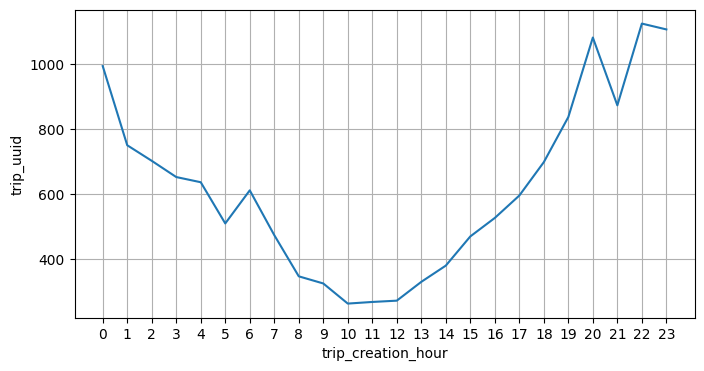

In [63]:
plt.figure(figsize = (8, 4))
sns.lineplot(data = df_hour,x = df_hour['trip_creation_hour'],y = df_hour['trip_uuid'])
plt.xticks(np.arange(0,24))
plt.grid('both')
plt.show()

**Insights:** The plot indicates that the number of trips increases after noon, reaches its maximum at 10 P.M., and then decreases.

#### How many trips are created on different days of the month?

In [64]:
trip_df['trip_creation_day'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3], dtype=int8)

In [65]:
df_day = trip_df.groupby(by = 'trip_creation_day')['trip_uuid'].count().to_frame().reset_index()
df_day.head()

,trip_creation_day,trip_uuid
0,1,605
1,2,552
2,3,631
3,12,747
4,13,750


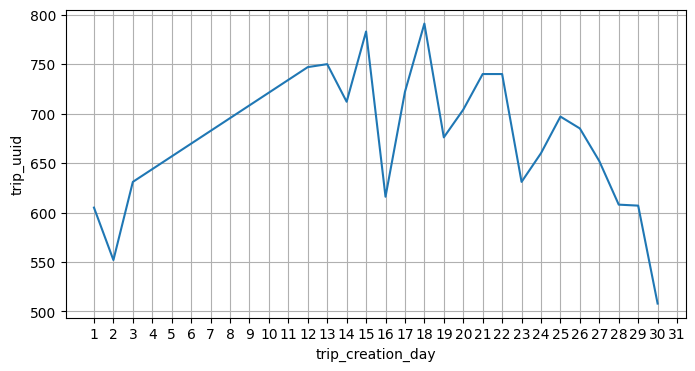

In [66]:
plt.figure(figsize = (8, 4))
sns.lineplot(data = df_day,x = df_day['trip_creation_day'],y = df_day['trip_uuid'])
plt.xticks(np.arange(1,32))
plt.grid('both')
plt.show()

**Insights:** The plot indicates that most trips are created during the mid-month, indicating that customers typically place more orders during this time.

#### How many trips are created for different weeks?

In [67]:
trip_df['trip_creation_week'].unique()

array([37, 38, 39, 40], dtype=int8)

In [68]:
df_week = trip_df.groupby(by = 'trip_creation_week')['trip_uuid'].count().to_frame().reset_index()
df_week

,trip_creation_week,trip_uuid
0,37,3608
1,38,5004
2,39,4417
3,40,1788


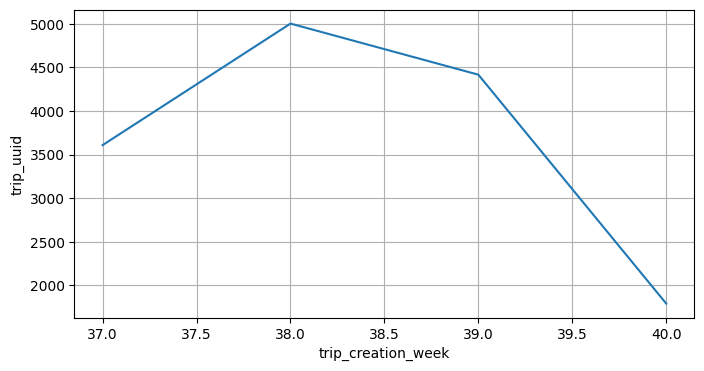

In [69]:
plt.figure(figsize = (8, 4))
sns.lineplot(data = df_week,x = df_week['trip_creation_week'],y = df_week['trip_uuid'])
plt.grid('both')
plt.show()

**Insights:** The plot indicates that the majority of trips are created during the 38th week.

#### How many trips are created for different months?

In [70]:
trip_df['trip_creation_month'].unique()

array([ 9, 10], dtype=int8)

In [71]:
df_month = trip_df.groupby(by = 'trip_creation_month')['trip_uuid'].count().to_frame().reset_index()
df_month

,trip_creation_month,trip_uuid
0,9,13029
1,10,1788


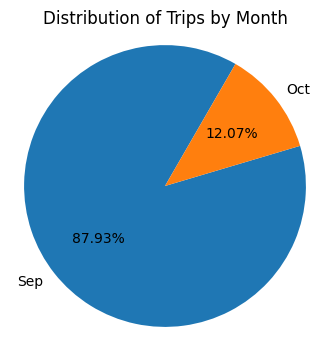

In [72]:
plt.figure(figsize=(4, 4))
plt.pie(df_month['trip_uuid'], labels=['Sep', 'Oct'], autopct='%1.2f%%', startangle=60)
plt.title('Distribution of Trips by Month')
plt.axis('equal')
plt.show()

**Insights:** The plot indicates that the trips peaked in September with around 87.93%

#### Distribution of Trip data (training / test)

In [73]:
trip_df['data'].unique()

['training', 'test']
Categories (2, object): ['test', 'training']

In [74]:
df_data = trip_df.groupby(by = 'data')['trip_uuid'].count().to_frame().reset_index()
df_data

,data,trip_uuid
0,test,4163
1,training,10654


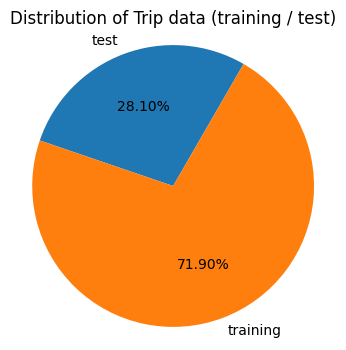

In [75]:
plt.figure(figsize=(4, 4))
plt.pie(df_data['trip_uuid'], labels=df_data['data'], autopct='%1.2f%%', startangle=60)
plt.title('Distribution of Trip data (training / test)')
plt.axis('equal')
plt.show()

**Insights:** The plot indicates that 71.9% of the trip data is for training and 28.1% is for testing.

#### Distribution of Trips by Route Type

In [76]:
trip_df['route_type'].unique()

['FTL', 'Carting']
Categories (2, object): ['Carting', 'FTL']

In [77]:
df_route_type = trip_df.groupby(by = 'route_type')['trip_uuid'].count().to_frame().reset_index()
df_route_type

,route_type,trip_uuid
0,Carting,8908
1,FTL,5909


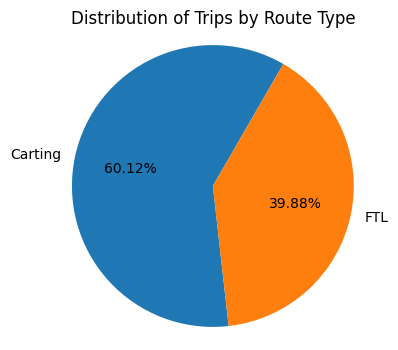

In [78]:
plt.figure(figsize=(4, 4))
plt.pie(df_route_type['trip_uuid'], labels=df_route_type['route_type'], autopct='%1.2f%%', startangle=60)
plt.title('Distribution of Trips by Route Type')
plt.axis('equal')
plt.show()

**Insights:** Carting accounted for 60.12% of trips, while FTL comprised 39.88%, indicating a higher preference for carting in transportation type.

#### Distribution of number of trips created from different states

In [79]:
df_source_state = trip_df.groupby('source_state')['trip_uuid'].count().reset_index().sort_values(by = 'trip_uuid', ascending = False)

df_source_state.head()

,source_state,trip_uuid
22,Maharashtra,2714
14,Karnataka,2143
10,Haryana,1838
29,Tamil Nadu,1039
30,Telangana,781


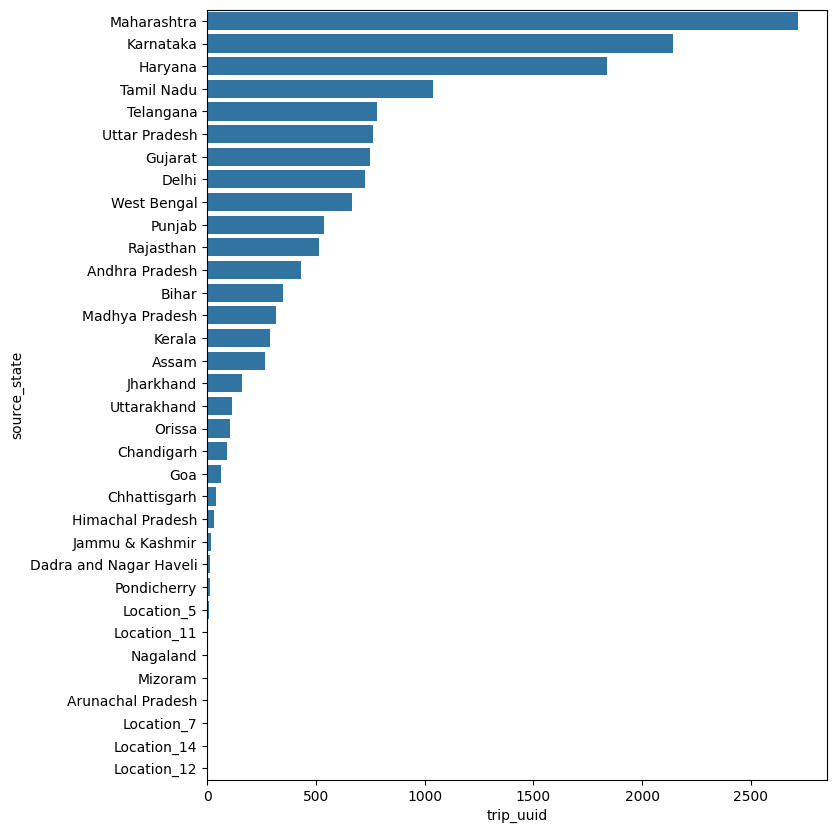

In [80]:
plt.figure(figsize = (8, 10))
sns.barplot(data = df_source_state,x = df_source_state['trip_uuid'],y = df_source_state['source_state'])
plt.show()

**Insights:** Maharashtra leads with most trips, followed by Karnataka and Haryana, suggesting strong seller base in these states.

#### Top 30 cities based on the number of trips created from different cities.

In [81]:
df_source_city = trip_df.groupby('source_city')['trip_uuid'].count().reset_index().sort_values(by = 'trip_uuid', ascending = False)[:30]

df_source_city.head()

,source_city,trip_uuid
439,Mumbai,1442
237,Gurgaon,1165
169,Delhi,883
79,Bengaluru,726
100,Bhiwandi,697


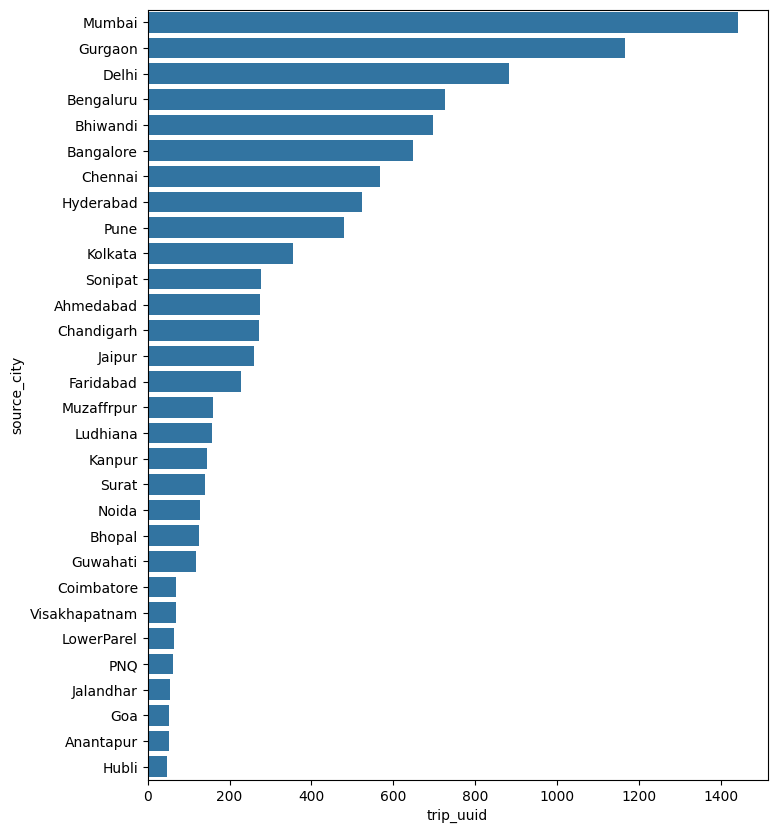

In [82]:
plt.figure(figsize = (8, 10))
sns.barplot(data = df_source_city,x = df_source_city['trip_uuid'],y = df_source_city['source_city'])
plt.show()

**Insights:** Most trips originate from Mumbai, followed by Gurgaon, Delhi, Bengaluru, and Bhiwandi, indicating strong seller base in these areas.

#### Distribution of number of trips which ended in different states

In [83]:
df_destination_state = trip_df.groupby('destination_state')['trip_uuid'].count().reset_index().sort_values(by = 'trip_uuid', ascending = False)

df_destination_state.head()

,destination_state,trip_uuid
26,Maharashtra,2561
15,Karnataka,2294
11,Haryana,1643
33,Tamil Nadu,1084
36,Uttar Pradesh,811


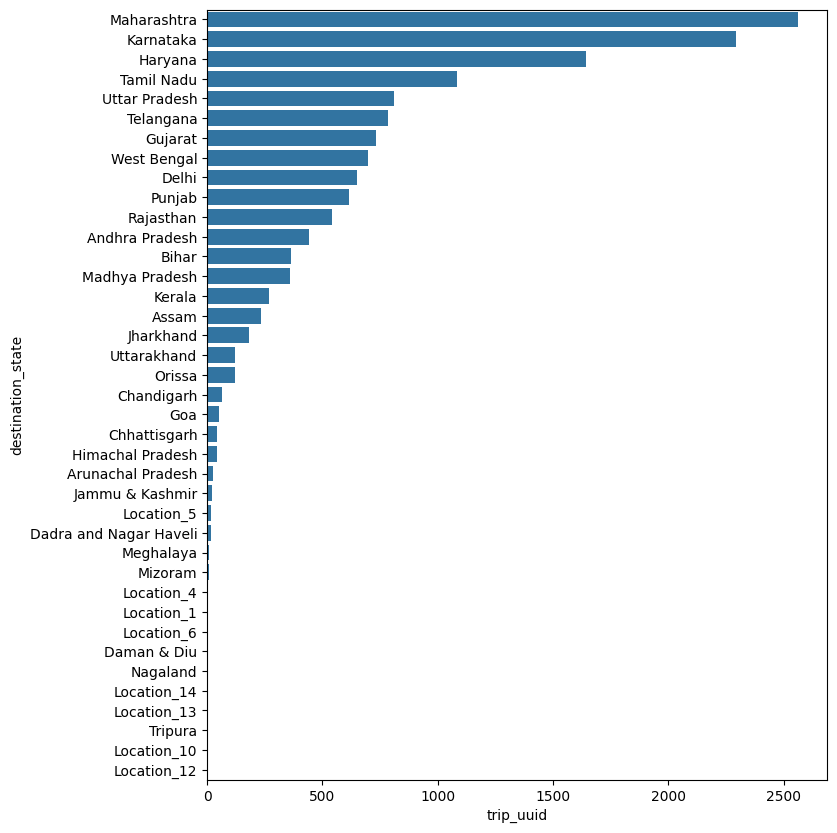

In [84]:
plt.figure(figsize = (8, 10))
sns.barplot(data = df_destination_state,x = df_destination_state['trip_uuid'],y = df_destination_state['destination_state'])
plt.show()

**Insights:** The plot shows that Maharashtra state, followed by Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh, has the highest number of orders placed in these states.

#### Top 30 cities based on the number of trips ended in different cities.

In [85]:
df_destination_city = trip_df.groupby('destination_city')['trip_uuid'].count().reset_index().sort_values(by = 'trip_uuid', ascending = False)[:30]

df_destination_city.head()

,destination_city,trip_uuid
515,Mumbai,1548
96,Bengaluru,975
282,Gurgaon,936
200,Delhi,778
163,Chennai,595


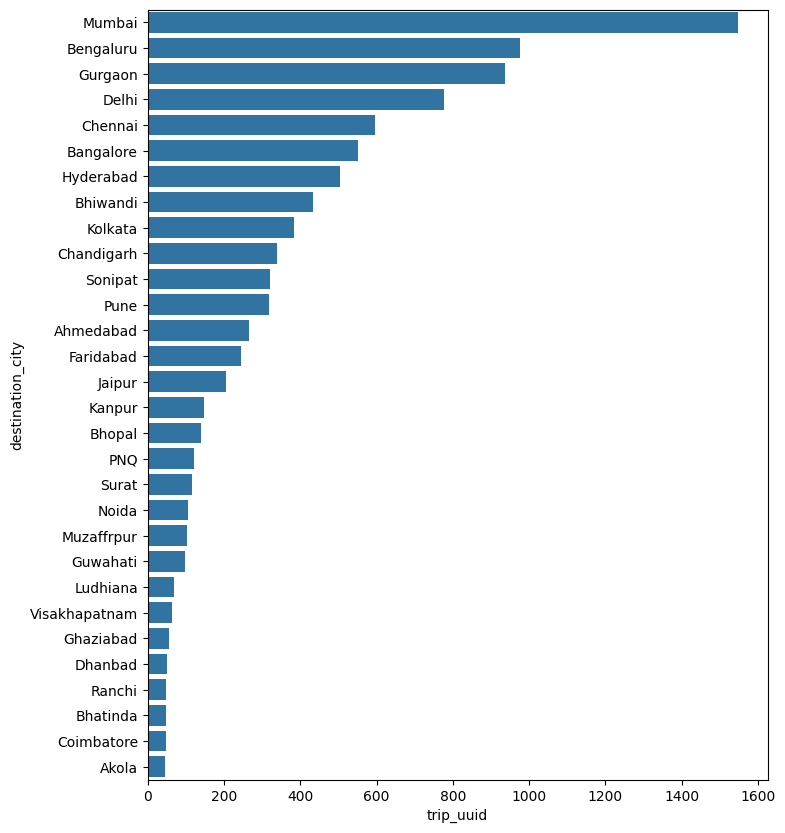

In [86]:
plt.figure(figsize = (8, 10))
sns.barplot(data = df_destination_city,x = df_destination_city['trip_uuid'],y = df_destination_city['destination_city'])
plt.show()

**Insights:** The plot shows that Mumbai city has the highest number of orders, followed by Bengaluru, Gurgaon, Delhi, and Chennai.

#### Correlation between numerical features

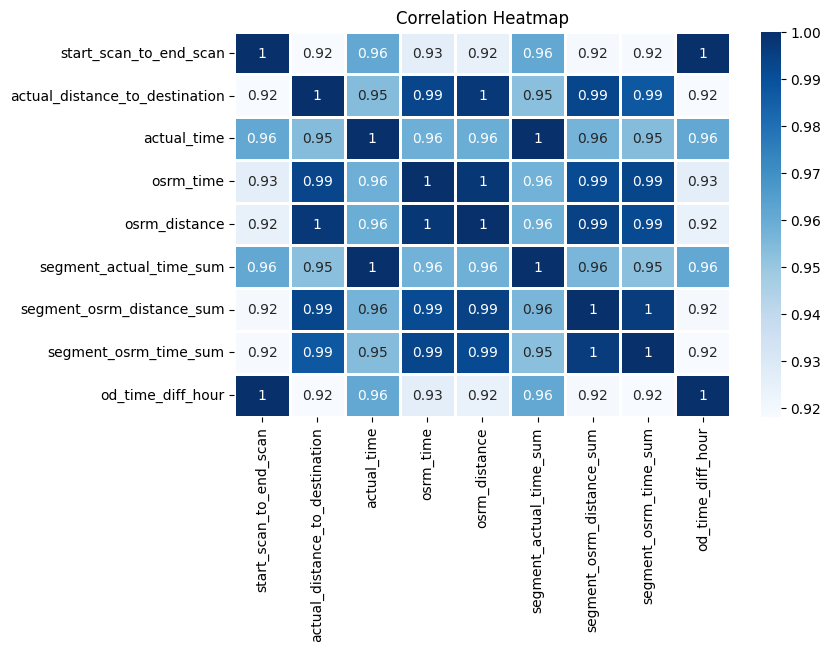

In [87]:
num_features = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum', 'segment_osrm_time_sum', 'od_time_diff_hour']

correlation_matrix = trip_df[num_features].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues',edgecolors='black',linewidths=0.8)
plt.title('Correlation Heatmap')

plt.show()

**Insights:** Very High Correlation (> 0.9) exists between all the numerical columns specified above.

### Outlier Detection & Treatment

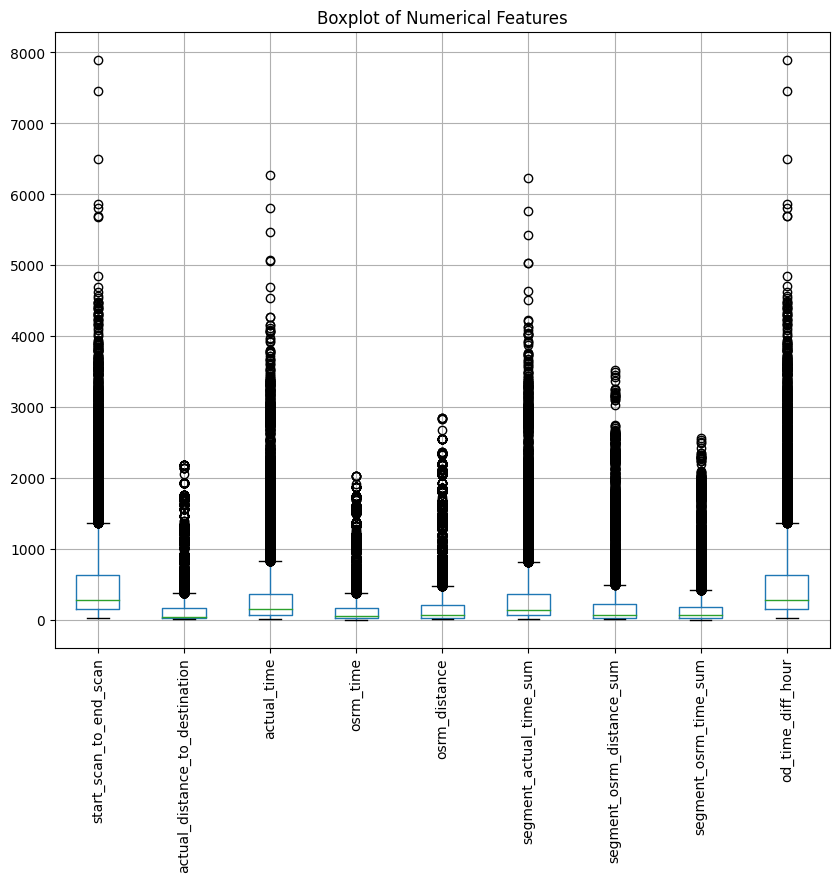

In [88]:
# Boxplot to visualize outliers

num_features = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum', 'segment_osrm_time_sum', 'od_time_diff_hour']
plt.figure(figsize=(10, 8))
trip_df[num_features].boxplot()
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

In [89]:
# Outlier treatment using IQR method

Q1 = trip_df[num_features].apply(lambda x: x.quantile(0.25))
Q3 = trip_df[num_features].apply(lambda x: x.quantile(0.75))
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with median

for col in num_features:
    trip_df[col] = trip_df[col].mask((trip_df[col] < lower_bound[col]) | (trip_df[col] > upper_bound[col]), trip_df[col].median())

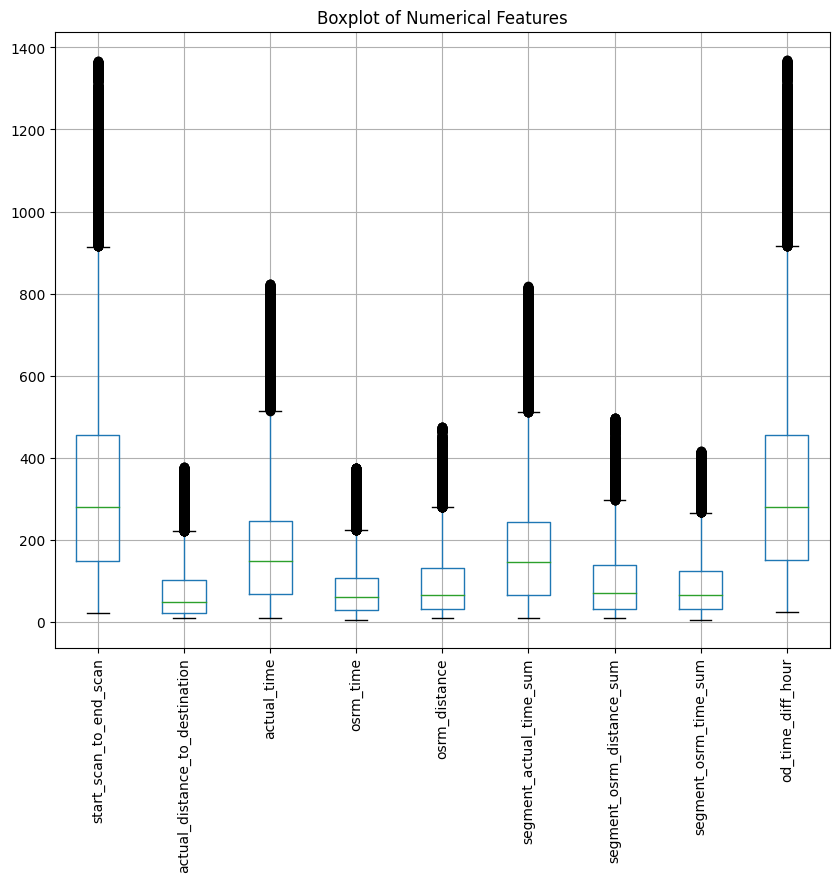

In [90]:
plt.figure(figsize=(10, 8))
trip_df[num_features].boxplot()
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

### Perform one-hot encoding on categorical features.

In [91]:
# Perform one-hot encoding on categorical variable 'route_type'

trip_df['route_type'].value_counts()

route_type
Carting    8908
FTL        5909
Name: count, dtype: int64

In [92]:
trip_df['route_type'] = trip_df['route_type'].map({'FTL':0, 'Carting':1})

In [93]:
trip_df['route_type'].value_counts()

route_type
1    8908
0    5909
Name: count, dtype: int64

In [94]:
# Perform one-hot encoding on categorical variable 'data'

trip_df['data'].value_counts()

data
training    10654
test         4163
Name: count, dtype: int64

In [95]:
trip_df['data'] = trip_df['data'].map({'training':0, 'test':1})

In [96]:
trip_df['data'].value_counts()

data
0    10654
1     4163
Name: count, dtype: int64

### Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [97]:
# Normalize numerical features using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
trip_df_normalized = trip_df.copy()
trip_df_normalized[num_features] = scaler.fit_transform(trip_df_normalized[num_features])

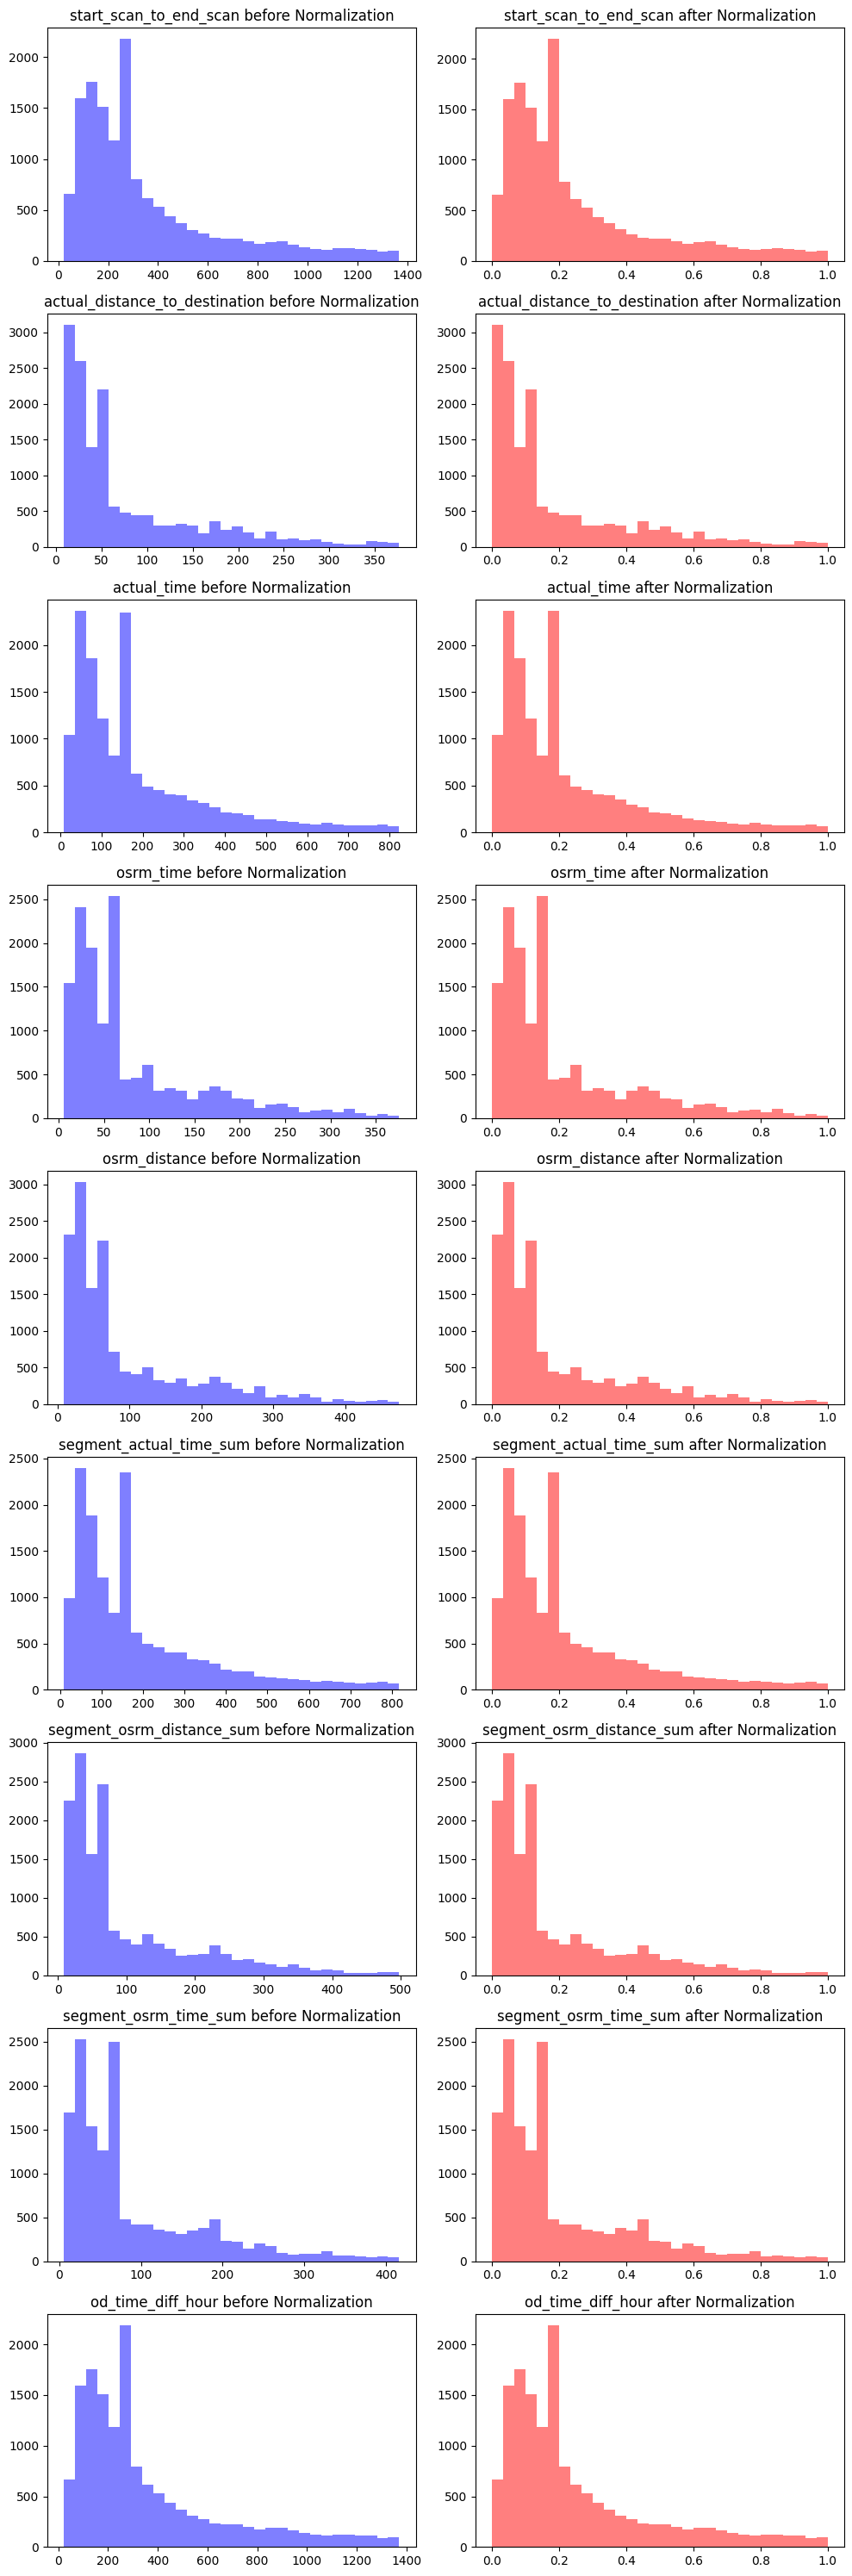

In [98]:
# Plot histograms for each numerical feature before and after normalization

plt.figure(figsize=(10, 30))
for i, feature in enumerate(num_features, 1):
    plt.subplot(len(num_features), 2, 2*i-1)
    plt.hist(trip_df[feature], bins=30, alpha=0.5, color='b')
    plt.title(feature + ' before Normalization')
    plt.subplot(len(num_features), 2, 2*i)
    plt.hist(trip_df_normalized[feature], bins=30, alpha=0.5, color='r')
    plt.title(feature + ' after Normalization')

plt.tight_layout()
plt.show()

In [99]:
# Standardize numerical features using StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
trip_df_standardized = trip_df.copy()
trip_df_standardized[num_features] = scaler.fit_transform(trip_df_standardized[num_features])

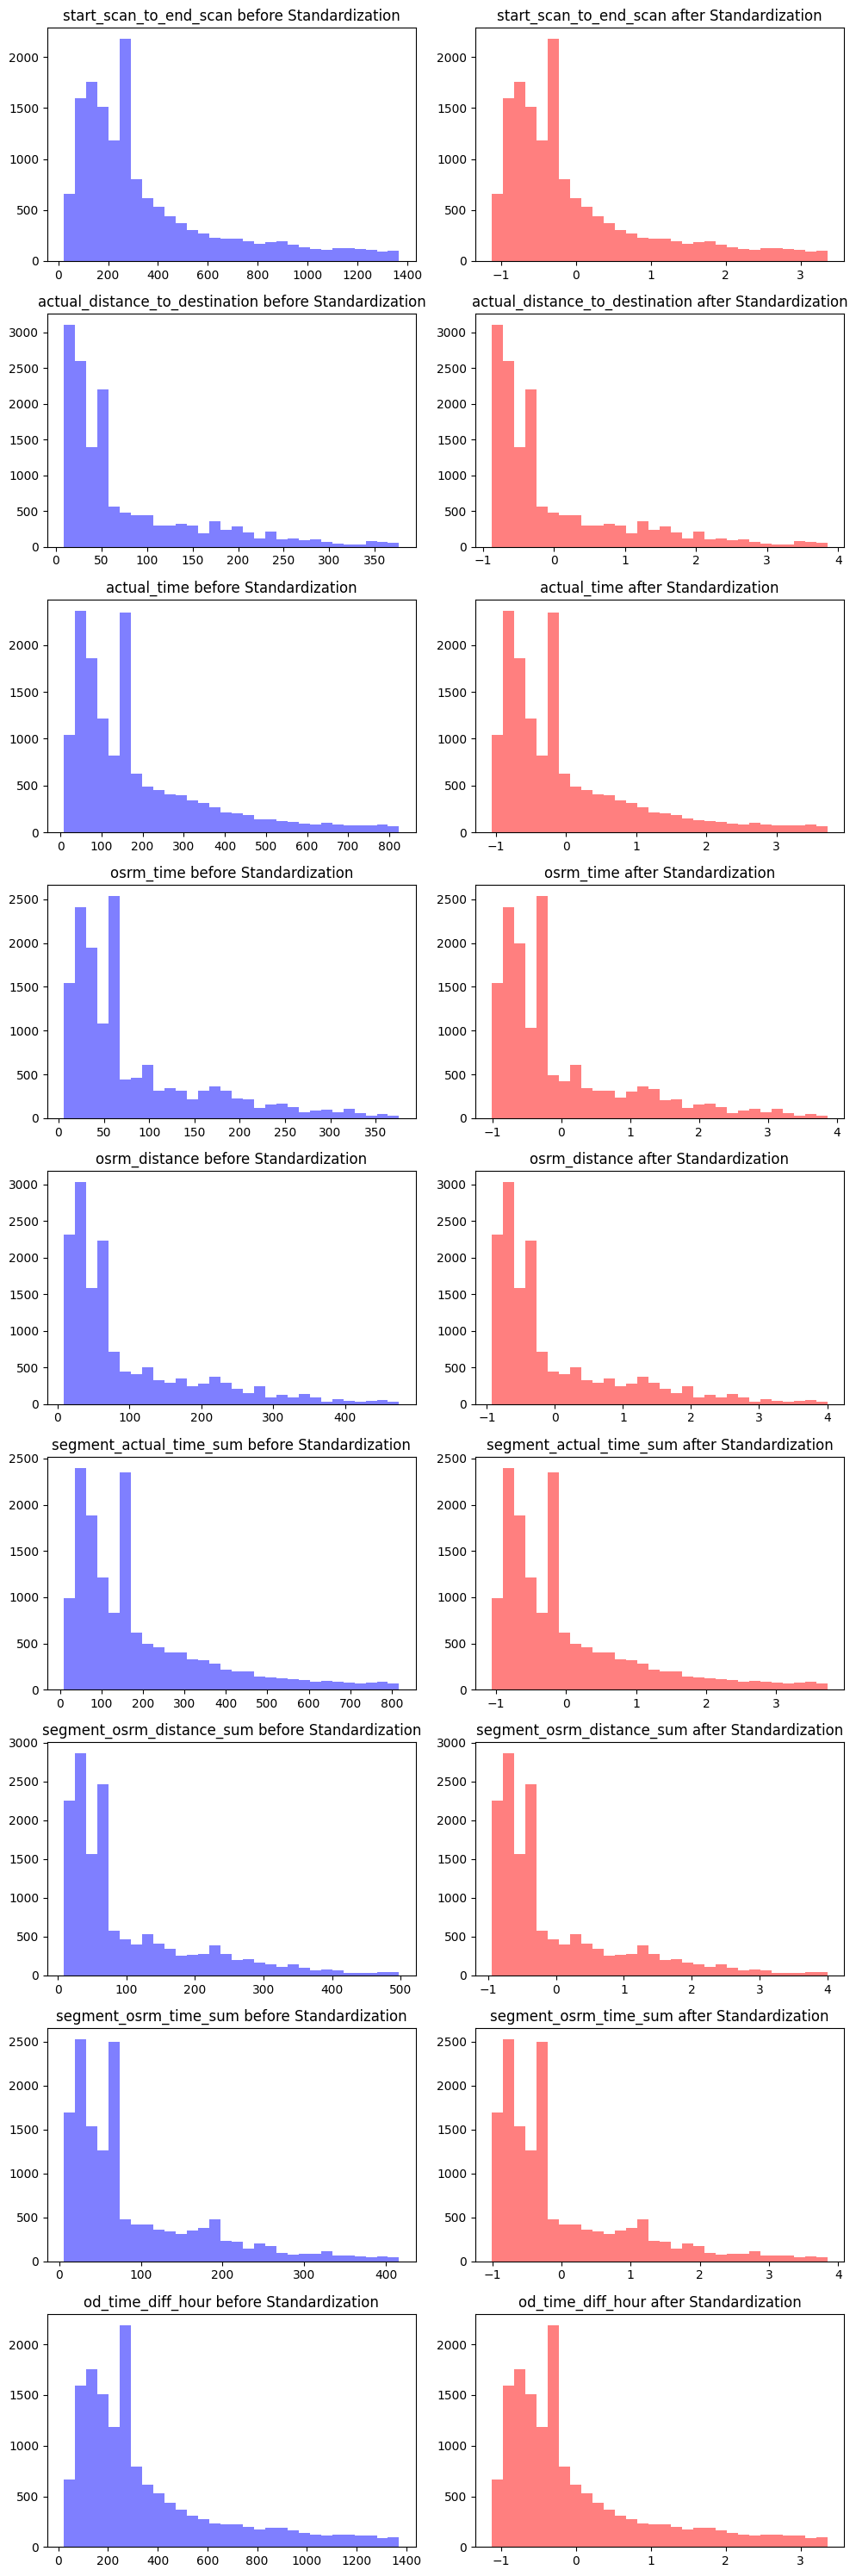

In [100]:
# Plot histograms for each numerical feature before and after standardization

plt.figure(figsize=(10, 30))
for i, feature in enumerate(num_features, 1):
    plt.subplot(len(num_features), 2, 2*i-1)
    plt.hist(trip_df[feature], bins=30, alpha=0.5, color='b')
    plt.title(feature + ' before Standardization')
    plt.subplot(len(num_features), 2, 2*i)
    plt.hist(trip_df_standardized[feature], bins=30, alpha=0.5, color='r')
    plt.title(feature + ' after Standardization')

plt.tight_layout()
plt.show()

## Hypothesis Testing

### Perform hypothesis testing / visual analysis between actual_time aggregated value and OSRM time aggregated value.

**Note:** Aggregated values are the values you'll get after merging the rows on the basis of trip_uuid.


In [101]:
trip_df[['actual_time', 'osrm_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
actual_time,14817.0,188.946136,170.548248,9.0,67.0,149.0,246.0,824.0
osrm_time,14817.0,82.471352,76.011269,6.0,29.0,60.0,107.0,376.0


In [102]:
# Extract aggregated values for actual_time and OSRM time

actual_time_aggregated = trip_df['actual_time']
osrm_time_aggregated = trip_df['osrm_time']

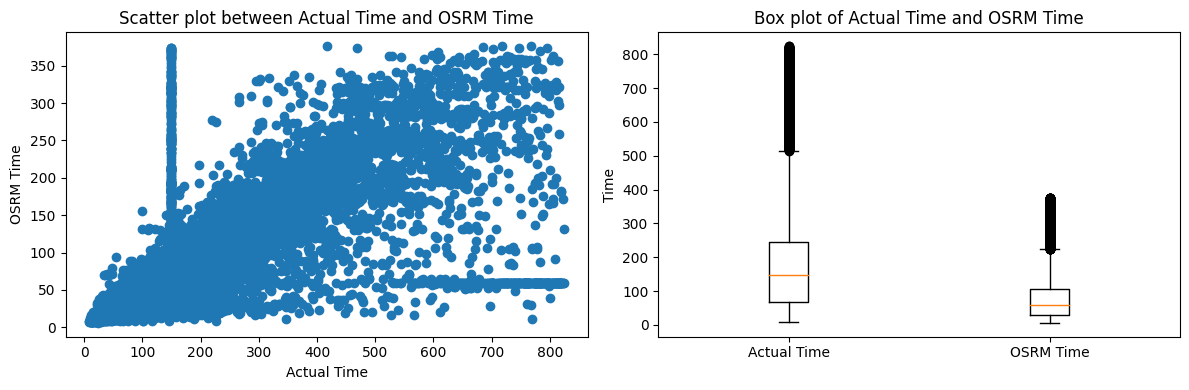

In [103]:
plt.figure(figsize=(12, 4))

# Scatter plot between Actual Time and OSRM Time
plt.subplot(1, 2, 1)
plt.scatter(actual_time_aggregated, osrm_time_aggregated)
plt.title('Scatter plot between Actual Time and OSRM Time')
plt.xlabel('Actual Time')
plt.ylabel('OSRM Time')

# Box plot of Actual Time and OSRM Time
plt.subplot(1, 2, 2)
plt.boxplot([actual_time_aggregated, osrm_time_aggregated], labels=['Actual Time', 'OSRM Time'])
plt.title('Box plot of Actual Time and OSRM Time')
plt.ylabel('Time')

plt.tight_layout()
plt.show()

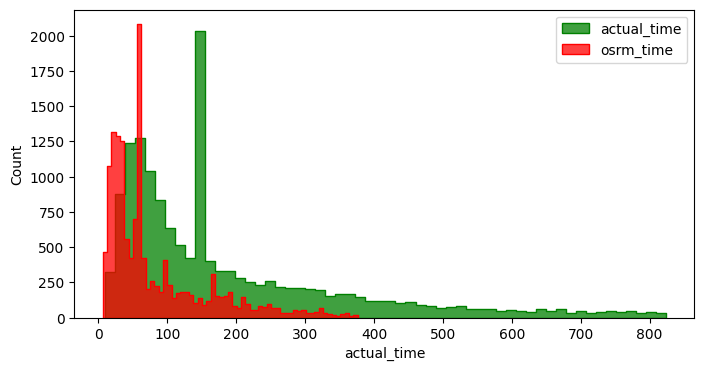

In [104]:
# Visual Tests to know if the samples follow normal distribution

plt.figure(figsize = (8, 4))
sns.histplot(actual_time_aggregated, element = 'step', color = 'g')
sns.histplot(osrm_time_aggregated, element = 'step', color = 'r')
plt.legend(['actual_time', 'osrm_time'])
plt.show()

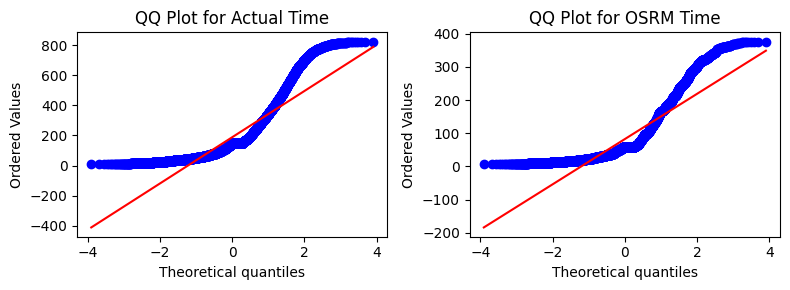

In [105]:
# Distribution check using QQ Plot
plt.figure(figsize=(8, 3))

# QQ plot for Actual Time
plt.subplot(1, 2, 1)
stats.probplot(actual_time_aggregated, dist="norm", plot=plt)
plt.title('QQ Plot for Actual Time')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')

# QQ plot for OSRM Time
plt.subplot(1, 2, 2)
stats.probplot(osrm_time_aggregated, dist="norm", plot=plt)
plt.title('QQ Plot for OSRM Time')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')

plt.tight_layout()
plt.show()

It can be seen from the above plots that the samples do not come from normal distribution.

In [106]:
# Homogeneity of Variances using Lavene's test

# Null Hypothesis(H0) - Variances are significantly same
# Alternate Hypothesis(HA) - Variances are significantly different
from scipy.stats import levene

# Perform Levene test
statistic, p_value = levene(actual_time_aggregated, osrm_time_aggregated)

print("Levene test statistic:", statistic)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis. Variances are significantly same.")

Levene test statistic: 3003.4220431681856
p-value: 0.0
Reject the null hypothesis. Variances are significantly different.


#### **2-Sample Independent T-test**

**Null Hypothesis:** There is no significant difference between `actual_time` and `osrm_time`.

**Alternate Hypothesis:** There is a significant difference between `actual_time` and `osrm_time`.

**Significance level (alpha):** 0.05

In [107]:
from scipy.stats import ttest_ind

# Perform two-sample t-test
t_stat, p_value = ttest_ind(actual_time_aggregated, osrm_time_aggregated)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between actual time and OSRM time.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between actual time and OSRM time.")


t-statistic: 69.41218478115277
p-value: 0.0
Reject null hypothesis: There is a significant difference between actual time and OSRM time.


### Perform hypothesis testing / visual analysis between actual_time aggregated value and segment actual time aggregated value.

**Note:** Aggregated values are the values you'll get after merging the rows on the basis of trip_uuid.


In [108]:
trip_df[['actual_time', 'segment_actual_time_sum']].describe().T

,count,mean,std,min,25%,50%,75%,max
actual_time,14817.0,188.946136,170.548248,9.0,67.0,149.0,246.0,824.0
segment_actual_time_sum,14817.0,187.113647,169.310013,9.0,66.0,147.0,244.0,818.0


In [109]:
# Extract aggregated values for actual_time and segment_actual_time_sum

actual_time_aggregated = trip_df['actual_time']
segment_actual_time_aggregated = trip_df['segment_actual_time_sum']

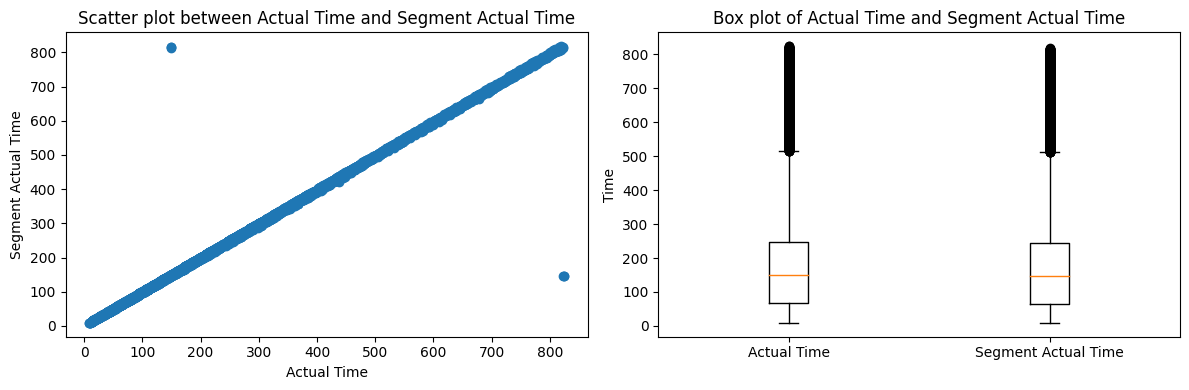

In [110]:
plt.figure(figsize=(12, 4))

# Scatter plot between Actual Time and Segment Actual Time
plt.subplot(1, 2, 1)
plt.scatter(actual_time_aggregated, segment_actual_time_aggregated)
plt.title('Scatter plot between Actual Time and Segment Actual Time')
plt.xlabel('Actual Time')
plt.ylabel('Segment Actual Time')

# Box plot of Actual Time and Segment Actual Time
plt.subplot(1, 2, 2)
plt.boxplot([actual_time_aggregated, segment_actual_time_aggregated], labels=['Actual Time', 'Segment Actual Time'])
plt.title('Box plot of Actual Time and Segment Actual Time')
plt.ylabel('Time')

plt.tight_layout()
plt.show()

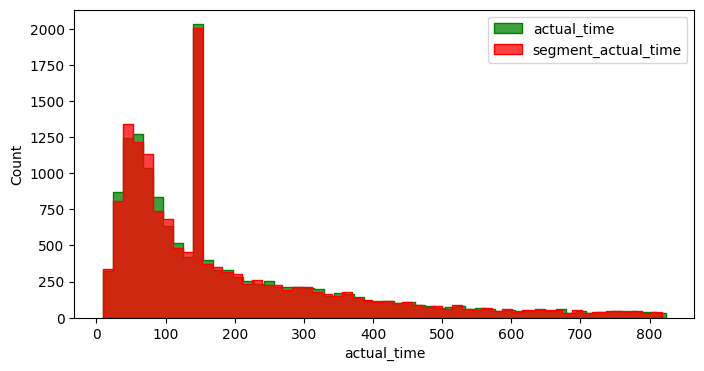

In [111]:
# Visual Tests to know if the samples follow normal distribution

plt.figure(figsize = (8, 4))
sns.histplot(actual_time_aggregated, element = 'step', color = 'g')
sns.histplot(segment_actual_time_aggregated, element = 'step', color = 'r')
plt.legend(['actual_time', 'segment_actual_time'])
plt.show()

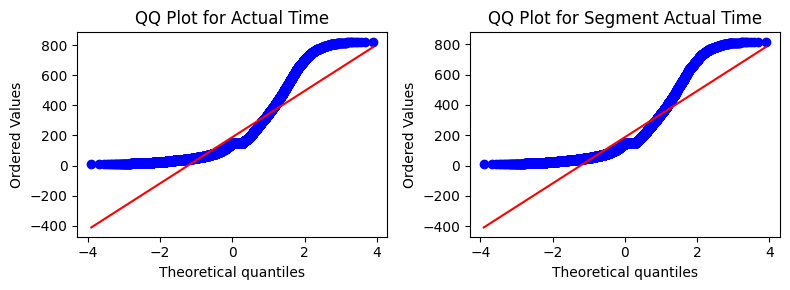

In [112]:
# Distribution check using QQ Plot
plt.figure(figsize=(8, 3))

# QQ plot for Actual Time
plt.subplot(1, 2, 1)
stats.probplot(actual_time_aggregated, dist="norm", plot=plt)
plt.title('QQ Plot for Actual Time')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')

# QQ plot for Segment Actual Time
plt.subplot(1, 2, 2)
stats.probplot(segment_actual_time_aggregated, dist="norm", plot=plt)
plt.title('QQ Plot for Segment Actual Time')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')

plt.tight_layout()
plt.show()

It can be seen from the above plots that the samples do not come from normal distribution.

In [113]:
# Homogeneity of Variances using Lavene's test

# Null Hypothesis(H0) - Variances are significantly same
# Alternate Hypothesis(HA) - Variances are significantly different
from scipy.stats import levene

# Perform Levene test
statistic, p_value = levene(actual_time_aggregated, segment_actual_time_aggregated)

print("Levene test statistic:", statistic)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis. Variances are significantly same.")

Levene test statistic: 0.4059423733549772
p-value: 0.5240411368231815
Fail to reject the null hypothesis. Variances are significantly same.


#### **2-Sample Independent T-test**

**Null Hypothesis:** There is no significant difference between `actual_time` and `segment_actual_time_sum`.

**Alternate Hypothesis:** There is a significant difference between `actual_time` and `segment_actual_time_sum`.

**Significance level (alpha):** 0.05

In [114]:
from scipy.stats import ttest_ind

# Perform two-sample t-test
t_stat, p_value = ttest_ind(actual_time_aggregated, segment_actual_time_aggregated)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between actual time and segment actual time.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between actual time and segment actual time.")


t-statistic: 0.9281877075529134
p-value: 0.35331777005247256
Fail to reject null hypothesis: There is no significant difference between actual time and segment actual time.


### Perform hypothesis testing / visual analysis between OSRM distance aggregated value and segment OSRM distance aggregated value.

**Note:** Aggregated values are the values you'll get after merging the rows on the basis of trip_uuid.


In [115]:
trip_df[['osrm_distance', 'segment_osrm_distance_sum']].describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_distance,14817.0,96.415627,94.621735,9.0729,30.819201,65.618805,130.632706,474.915802
segment_osrm_distance_sum,14817.0,102.238495,99.107132,9.0729,32.654499,70.154404,138.751999,497.855377


In [116]:
# Extract aggregated values for osrm_distance and segment_osrm_distance_sum

osrm_distance_aggregated = trip_df['osrm_distance']
segment_osrm_distance_aggregated = trip_df['segment_osrm_distance_sum']

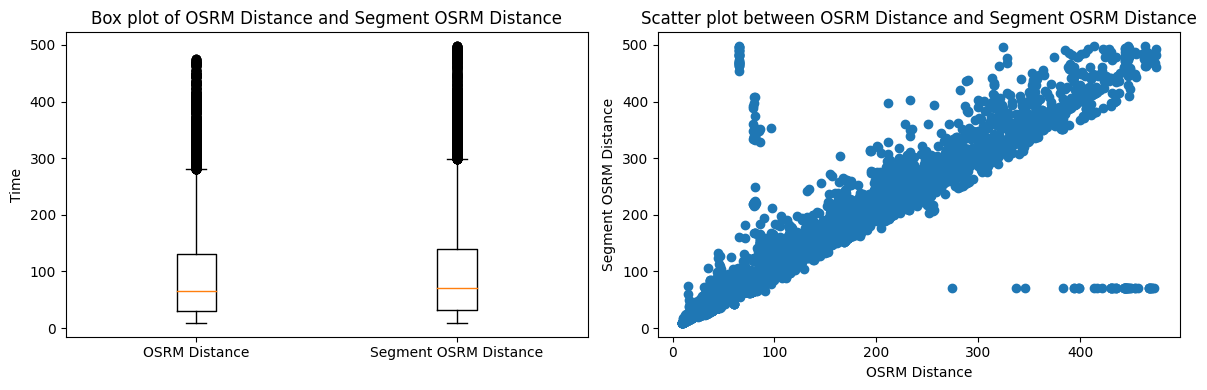

In [117]:
plt.figure(figsize=(12, 4))

# Scatter plot between OSRM Distance and Segment OSRM Distance
plt.subplot(1, 2, 2)
plt.scatter(osrm_distance_aggregated, segment_osrm_distance_aggregated)
plt.title('Scatter plot between OSRM Distance and Segment OSRM Distance')
plt.xlabel('OSRM Distance')
plt.ylabel('Segment OSRM Distance')

# Box plot of OSRM Distance and Segment OSRM Distance
plt.subplot(1, 2, 1)
plt.boxplot([osrm_distance_aggregated, segment_osrm_distance_aggregated], labels=['OSRM Distance', 'Segment OSRM Distance'])
plt.title('Box plot of OSRM Distance and Segment OSRM Distance')
plt.ylabel('Time')

plt.tight_layout()
plt.show()

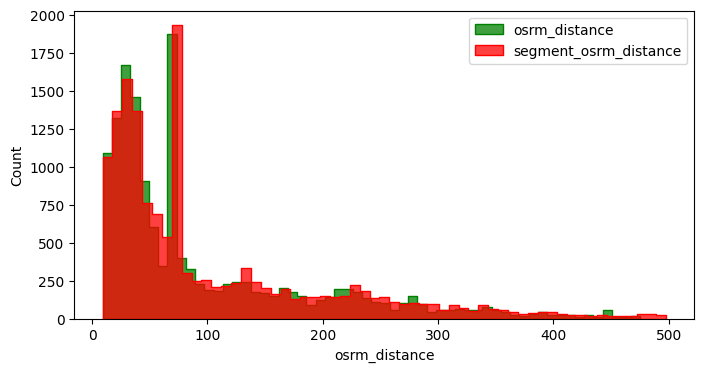

In [118]:
# Visual Tests to know if the samples follow normal distribution

plt.figure(figsize = (8, 4))
sns.histplot(osrm_distance_aggregated, element = 'step', color = 'g')
sns.histplot(segment_osrm_distance_aggregated, element = 'step', color = 'r')
plt.legend(['osrm_distance', 'segment_osrm_distance'])
plt.show()

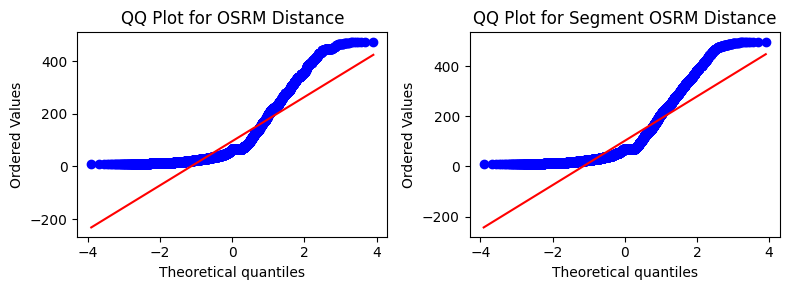

In [119]:
# Distribution check using QQ Plot
plt.figure(figsize=(8, 3))

# QQ plot for OSRM Distance
plt.subplot(1, 2, 1)
stats.probplot(osrm_distance_aggregated, dist="norm", plot=plt)
plt.title('QQ Plot for OSRM Distance')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')

# QQ plot for Segment OSRM Distance
plt.subplot(1, 2, 2)
stats.probplot(segment_osrm_distance_aggregated, dist="norm", plot=plt)
plt.title('QQ Plot for Segment OSRM Distance')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')

plt.tight_layout()
plt.show()

It can be seen from the above plots that the samples do not come from normal distribution.

In [120]:
# Homogeneity of Variances using Lavene's test

# Null Hypothesis(H0) - Variances are significantly same
# Alternate Hypothesis(HA) - Variances are significantly different
from scipy.stats import levene

# Perform Levene test
statistic, p_value = levene(osrm_distance_aggregated, segment_osrm_distance_aggregated)

print("Levene test statistic:", statistic)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis. Variances are significantly same.")

Levene test statistic: 13.505038875217993
p-value: 0.00023834304922331565
Reject the null hypothesis. Variances are significantly different.


#### **2-Sample Independent T-test**

**Null Hypothesis:** There is no significant difference between `osrm_distance` and `segment_osrm_distance_sum`.

**Alternate Hypothesis:** There is a significant difference between `osrm_distance` and `segment_osrm_distance_sum`.

**Significance level (alpha):** 0.05

In [121]:
from scipy.stats import ttest_ind

# Perform two-sample t-test
t_stat, p_value = ttest_ind(osrm_distance_aggregated, segment_osrm_distance_aggregated)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between osrm distance and segment osrm distance.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between osrm distance and segment osrm distance.")


t-statistic: -5.172748870055313
p-value: 2.3217494391170977e-07
Reject null hypothesis: There is a significant difference between osrm distance and segment osrm distance.


### Perform hypothesis testing / visual analysis between OSRM time aggregated value and segment OSRM time aggregated value.

**Note:** Aggregated values are the values you'll get after merging the rows on the basis of trip_uuid.


In [122]:
trip_df[['osrm_time', 'segment_osrm_time_sum']].describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_time,14817.0,82.471352,76.011269,6.0,29.0,60.0,107.0,376.0
segment_osrm_time_sum,14817.0,90.779846,84.648582,6.0,31.0,65.0,125.0,416.0


In [123]:
# Extract aggregated values for osrm_time and segment_osrm_time_sum

osrm_time_aggregated = trip_df['osrm_time']
segment_osrm_time_aggregated = trip_df['segment_osrm_time_sum']

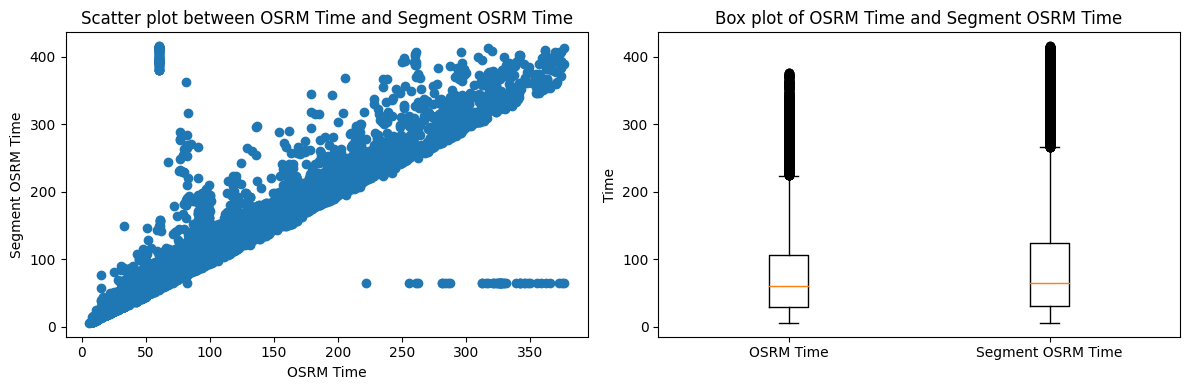

In [124]:
plt.figure(figsize=(12, 4))

# Scatter plot between OSRM Time and Segment OSRM Time
plt.subplot(1, 2, 1)
plt.scatter(osrm_time_aggregated, segment_osrm_time_aggregated)
plt.title('Scatter plot between OSRM Time and Segment OSRM Time')
plt.xlabel('OSRM Time')
plt.ylabel('Segment OSRM Time')

# Box plot of OSRM Time and Segment OSRM Time
plt.subplot(1, 2, 2)
plt.boxplot([osrm_time_aggregated, segment_osrm_time_aggregated], labels=['OSRM Time', 'Segment OSRM Time'])
plt.title('Box plot of OSRM Time and Segment OSRM Time')
plt.ylabel('Time')

plt.tight_layout()
plt.show()

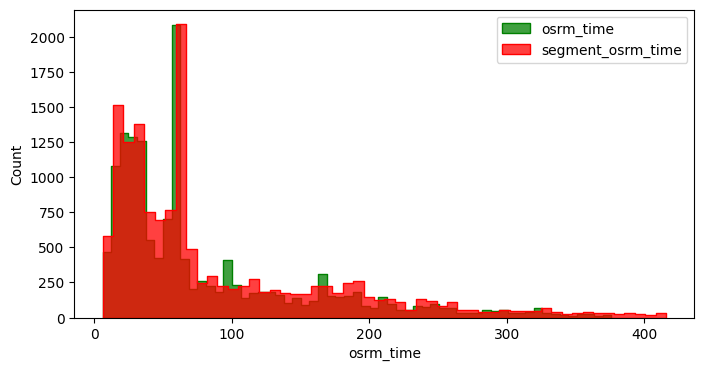

In [125]:
# Visual Tests to know if the samples follow normal distribution

plt.figure(figsize = (8, 4))
sns.histplot(osrm_time_aggregated, element = 'step', color = 'g')
sns.histplot(segment_osrm_time_aggregated, element = 'step', color = 'r')
plt.legend(['osrm_time', 'segment_osrm_time'])
plt.show()

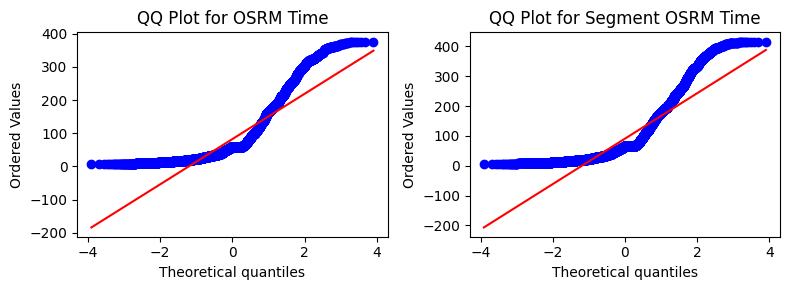

In [126]:
# Distribution check using QQ Plot
plt.figure(figsize=(8, 3))

# QQ plot for OSRM Time
plt.subplot(1, 2, 1)
stats.probplot(osrm_time_aggregated, dist="norm", plot=plt)
plt.title('QQ Plot for OSRM Time')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')

# QQ plot for Segment OSRM Time
plt.subplot(1, 2, 2)
stats.probplot(segment_osrm_time_aggregated, dist="norm", plot=plt)
plt.title('QQ Plot for Segment OSRM Time')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')

plt.tight_layout()
plt.show()

It can be seen from the above plots that the samples do not come from normal distribution.

In [127]:
# Homogeneity of Variances using Lavene's test

# Null Hypothesis(H0) - Variances are significantly same
# Alternate Hypothesis(HA) - Variances are significantly different
from scipy.stats import levene

# Perform Levene test
statistic, p_value = levene(osrm_time_aggregated, segment_osrm_time_aggregated)

print("Levene test statistic:", statistic)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis. Variances are significantly same.")

Levene test statistic: 70.69349196722928
p-value: 4.357227325664258e-17
Reject the null hypothesis. Variances are significantly different.


#### **2-Sample Independent T-test**

**Null Hypothesis:** There is no significant difference between `osrm_time` and `segment_osrm_time_sum`.

**Alternate Hypothesis:** There is a significant difference between `osrm_time` and `segment_osrm_time_sum`.

**Significance level (alpha):** 0.05

In [128]:
from scipy.stats import ttest_ind

# Perform two-sample t-test
t_stat, p_value = ttest_ind(osrm_time_aggregated, segment_osrm_time_aggregated)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between osrm time and segment osrm time.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between osrm time and segment osrm time.")


t-statistic: -8.889624150490034
p-value: 6.471278631274815e-19
Reject null hypothesis: There is a significant difference between osrm time and segment osrm time.


## Business Insights & Recommendations

## Business Insights

*  Data spans from 12th September 2018 to 8th October 2018.

*  There are about 14817 unique trip IDs, 938 unique source centers, 1042 unique destination_centers, 690 unique source cities, 806 unique destination cities.

*  Data is primarily used for training rather than testing.

*  Most common route type is Carting.

*  The names of 14 unique location ids are missing in the data.

*  The number of trips increases after noon, reaches its maximum at 10 P.M., and then decreases.

*  Maximum trips are created in the 38th week.

*  Most trips are created during the mid-month, indicating that customers typically place more orders during this time.

*  Most orders are sourced from the states like Maharashtra, Karnataka, Haryana, Tamil Nadu and Telangana.

*  Maximum number of trips originated from Mumbai city followed by Gurgaon,  Delhi, Bengaluru and Bhiwandi, indicating strong seller base in these cities.

*  Maximum number of trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh. This indicates that the number of orders placed in these states is significantly high.

*  Maximum number of trips ended in Mumbai city followed by Bengaluru, Gurgaon, Delhi and Chennai. This indicates that the number of orders placed in these cities is significantly high.

*  Most orders in terms of destination are coming from cities like Bengaluru, Mumbai, Gurgaon, Bangalore and Delhi.

*  Actual time aggregated value and OSRM time aggregated value are statistically different.

*  Actual time aggregated value and segment actual time aggregated value are statistically same.

*  OSRM distance aggregated value and segment OSRM distance aggregated value are statistically different.

*  OSRM time aggregated value and segment OSRM time aggregated value are statistically different.

## Recommendations

*  **Enhance OSRM Trip Planning System:** Invest in improving the OSRM trip planning system to minimize discrepancies and provide more accurate routing for transporters.

*  **Reduce Discrepancies in Time Estimates:** Address differences between OSRM time and actual time to enhance delivery time prediction accuracy, improving customer satisfaction.

*  **Ensure Route Compliance:** Investigate why OSRM distance and actual distance covered differ, ensuring delivery personnel adhere to predefined routes for timely deliveries.

*  **Optimize Existing Corridors:** Focus on enhancing existing transportation corridors to improve penetration and service quality in high-demand areas like Maharashtra, Karnataka, Haryana, and Tamil Nadu.

*  **Customer Profiling:** Conduct thorough customer profiling for regions with high order volumes to understand preferences, behaviors, and pain points, facilitating tailored services and improved customer experiences.

*  **Traffic and Terrain Analysis:** Analyze traffic patterns and terrain conditions in states with high order volumes to plan logistics and anticipate challenges, particularly during peak festival seasons.

*  **Strategic Expansion:** Consider strategic expansion initiatives in regions with emerging demand, aligning with customer preferences and market opportunities.

*  **Technology Integration:** Explore integrating advanced technology solutions for real-time route optimization, traffic monitoring, and predictive analytics to streamline operations and enhance efficiency.

*  **Supply Chain Collaboration:** Foster collaboration and partnerships within the supply chain ecosystem to leverage synergies, optimize resources, and improve overall service delivery.

*  **Continuous Improvement:** Implement a culture of continuous improvement, regularly reviewing processes, performance metrics, and customer feedback to drive ongoing enhancements and innovation in service delivery.